In [19]:
%pylab inline
import pandas as pd
import seaborn as sns
import scipy
import skimage
# sns.set_style("ticks")
from pathlib import Path
output_path_images = Path("../text/")
path_to_script =  Path("~/projects/scaffan/").expanduser()
sys.path.insert(0, str(path_to_script))
import scaffan
import scaffan.texture
import io3d # just to get data
import scaffan.image as scim
import io3d

Populating the interactive namespace from numpy and matplotlib


# Read the data

2020-03-29 16:26:36.915 | DEBUG    | io3d.cachefile:__init__:26 - cache filename: ~/.io3d_cache.yaml
2020-03-29 16:26:36.918 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_.
2020-03-29 16:26:36.920 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical
2020-03-29 16:26:36.922 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical/orig
2020-03-29 16:26:36.923 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical/orig/Scaffan-analysis
2020-03-29 16:26:36.926 | DEBUG    | io3d.datasets:join_path:303 - sample_data_pathC:\Users\Jirik\data
2020-03-29 16:26:36.927 | DEBUG    | io3d.datasets:join_path:304 - path C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-003_J-18-0165_HE.ndpi
2020-03-29 16:26:36.929 | DEBUG    | scaffan.image:__init__:203 - fs_enc: utf-8
2020-03-29 16:26:36.930 | DEBUG    | scaffan.image:__init__

[0.007271901, 0.007271901]
filename: C:\Users\Jirik\data\medical\orig\Scaffan-analysis\PIG-003_J-18-0165_HE.ndpi


2020-03-29 16:26:37.889 | DEBUG    | scaffan.annotation:read_annotations:122 - windows annotation output:b'\x1b2020-03-29 16:26:37.779\x1b | \x1b\x1bDEBUG   \x1b | \x1bscaffan.annotation\x1b:\x1bndpa_to_json\x1b:\x1b72\x1b - \x1b\x1bPATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C...\x1b\r\n'


[51]


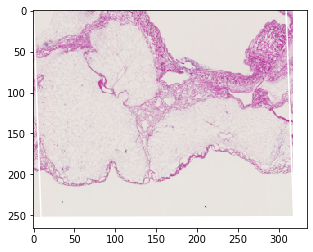

In [20]:
pixelsize_mm=[0.007271901] * 2
# pixelsize_mm=[0.00363595] * 2
# pixelsize_mm=[0.001817975] * 2
print(pixelsize_mm)

# fn = io3d.datasets.join_path("medical", "orig", "sample_data", "SCP003", "SCP003.ndpi", get_root=True)
fn = io3d.datasets.join_path("medical", "orig", "Scaffan-analysis", "PIG-003_J-18-0165_HE.ndpi", get_root=True)
title = "full segmentation"


ofn_filled = output_path_images / f"ground_true_annotation_{Path(fn).stem}_{title}_pixelsize_mm_{pixelsize_mm[0]}.png"
ofn_raster = output_path_images / f"raster_{Path(fn).stem}_{title}_pixelsize_mm_{pixelsize_mm[0]}.png"


print(f"filename: {fn}")
anim = scim.AnnotatedImage(fn)

# ann_ids = anim.select_annotations_by_color("#000000")
ann_ids = anim.select_annotations_by_title(title)
print(ann_ids)
view = anim.get_views(
    ann_ids, 
#     level=6, 
    margin=0, pixelsize_mm=pixelsize_mm)[0]

img = view.get_region_image(as_gray=False)
plt.imsave(ofn_raster, img)

plt.imshow(img, cmap='gray')
view.plot_annotations(ann_ids[0])

# Get manual segmentations

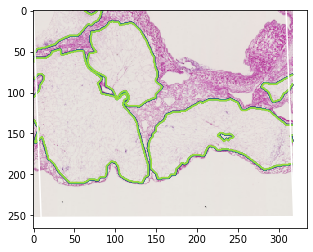

In [21]:

seg_black = view.get_annotation_raster_by_color("#000000")
seg_magenta = view.get_annotation_raster_by_color("#FF00FF")
seg_red = view.get_annotation_raster_by_color("#FF0000")

plt.imshow(img)
plt.contour(seg_black)
view.plot_annotations(ann_ids[0])


# Remove overlays

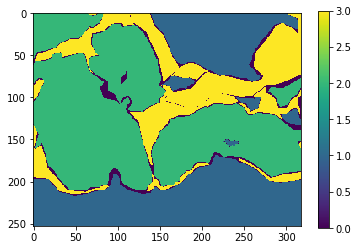

In [22]:
# see overlays
# plt.imshow(img)
overlays = (1*seg_black + 1*seg_magenta + 1* seg_red) > 1
segmentation = 2*seg_black + 1*seg_magenta + 3* seg_red
segmentation[overlays] = 0
plt.imshow(segmentation)
plt.colorbar()
# view.plot_annotations(ann_ids[0])

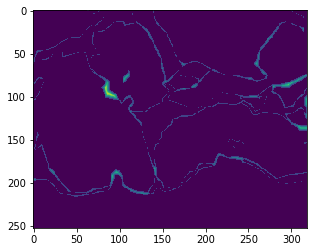

In [23]:
from scipy.ndimage import morphology
dst, inds = morphology.distance_transform_edt(segmentation==0, return_indices=True)
plt.imshow(dst)

# Fill the gaps

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


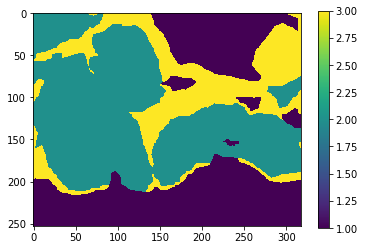

In [24]:
# plt.imshow(segmentation[inds[0], inds[1]])
filled = segmentation[[*inds]]
plt.imshow(filled, vmin=1)
plt.colorbar()

In [25]:
plt.imsave(ofn_filled, filled, 
#            cmap='gray', 
           vmin=0) # , "fn.png")

In [26]:
Path(fn).stem

'PIG-003_J-18-0165_HE'

In [27]:
# ann_raster = view.get_annotation_region_raster(outer_ids[0], holes_ids=hole_ids)